# Binary Classification of Machine Failures

"The dataset for this competition (both train and test) was generated from a deep learning model trained on the Machine Failure Predictions."

The **aim** is to predict the label "machine failure" (0/1)

**Sources**:

- [Kaggle challenge](https://www.kaggle.com/competitions/playground-series-s3e17/data?select=train.csv)
- [Original Dataset](https://www.kaggle.com/datasets/dineshmanikanta/machine-failure-predictions)

# Outline
- [ 1 - Read Data ](#1) 
- [ 2 - EDA - Exploratory Data Analysis](#2)
- [ 3 - Preprocessing Data Before Modeling](#3)
- [ 4 - Model Training](#4)
- [ 5 - Model Comparison](#5)
- [ 6 - Model Tuning](#6)
- [ 7 - Model Diagnostic](#7)
- [ 8 - Challenge Submission](#8)

In [1]:
# importing standard libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, LearningCurveDisplay, ShuffleSplit

from xgboost import XGBClassifier

In [2]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'axes.titlesize': 16,
    'figure.figsize': (12, 4),
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('colorblind'), 
              rc=theme_parameters)

<a name="1"></a>
# Read Data

In [4]:
read_from_kaggle = False

In [18]:
if read_from_kaggle:
    
    data = pd.read_csv('',
                       index_col=0)
    test_data = pd.read_csv('',
                       index_col=0)
    orig_data = pd.read_csv('',
                            index_col=0)
    
    
else:

    train_data = pd.read_csv("./../data/machine_failure_train.csv",
                             index_col=0)
    test_data = pd.read_csv("./../data/machine_failure_test.csv",
                            index_col=0)
    orig_data = pd.read_csv("./../data/machine_failure_original.csv",
                            index_col=0)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 14.6+ MB


In [13]:
train_data.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90954 entries, 136429 to 227382
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               90954 non-null  object 
 1   Type                     90954 non-null  object 
 2   Air temperature [K]      90954 non-null  float64
 3   Process temperature [K]  90954 non-null  float64
 4   Rotational speed [rpm]   90954 non-null  int64  
 5   Torque [Nm]              90954 non-null  float64
 6   Tool wear [min]          90954 non-null  int64  
 7   TWF                      90954 non-null  int64  
 8   HDF                      90954 non-null  int64  
 9   PWF                      90954 non-null  int64  
 10  OSF                      90954 non-null  int64  
 11  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 9.0+ MB


In [14]:
test_data.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,
136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [19]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [20]:
orig_data.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


<a name="2"></a>
# EDA - Exploratory Data Analysis

## Numeric Feature Distribution Train vs Test vs Original Data KDEs

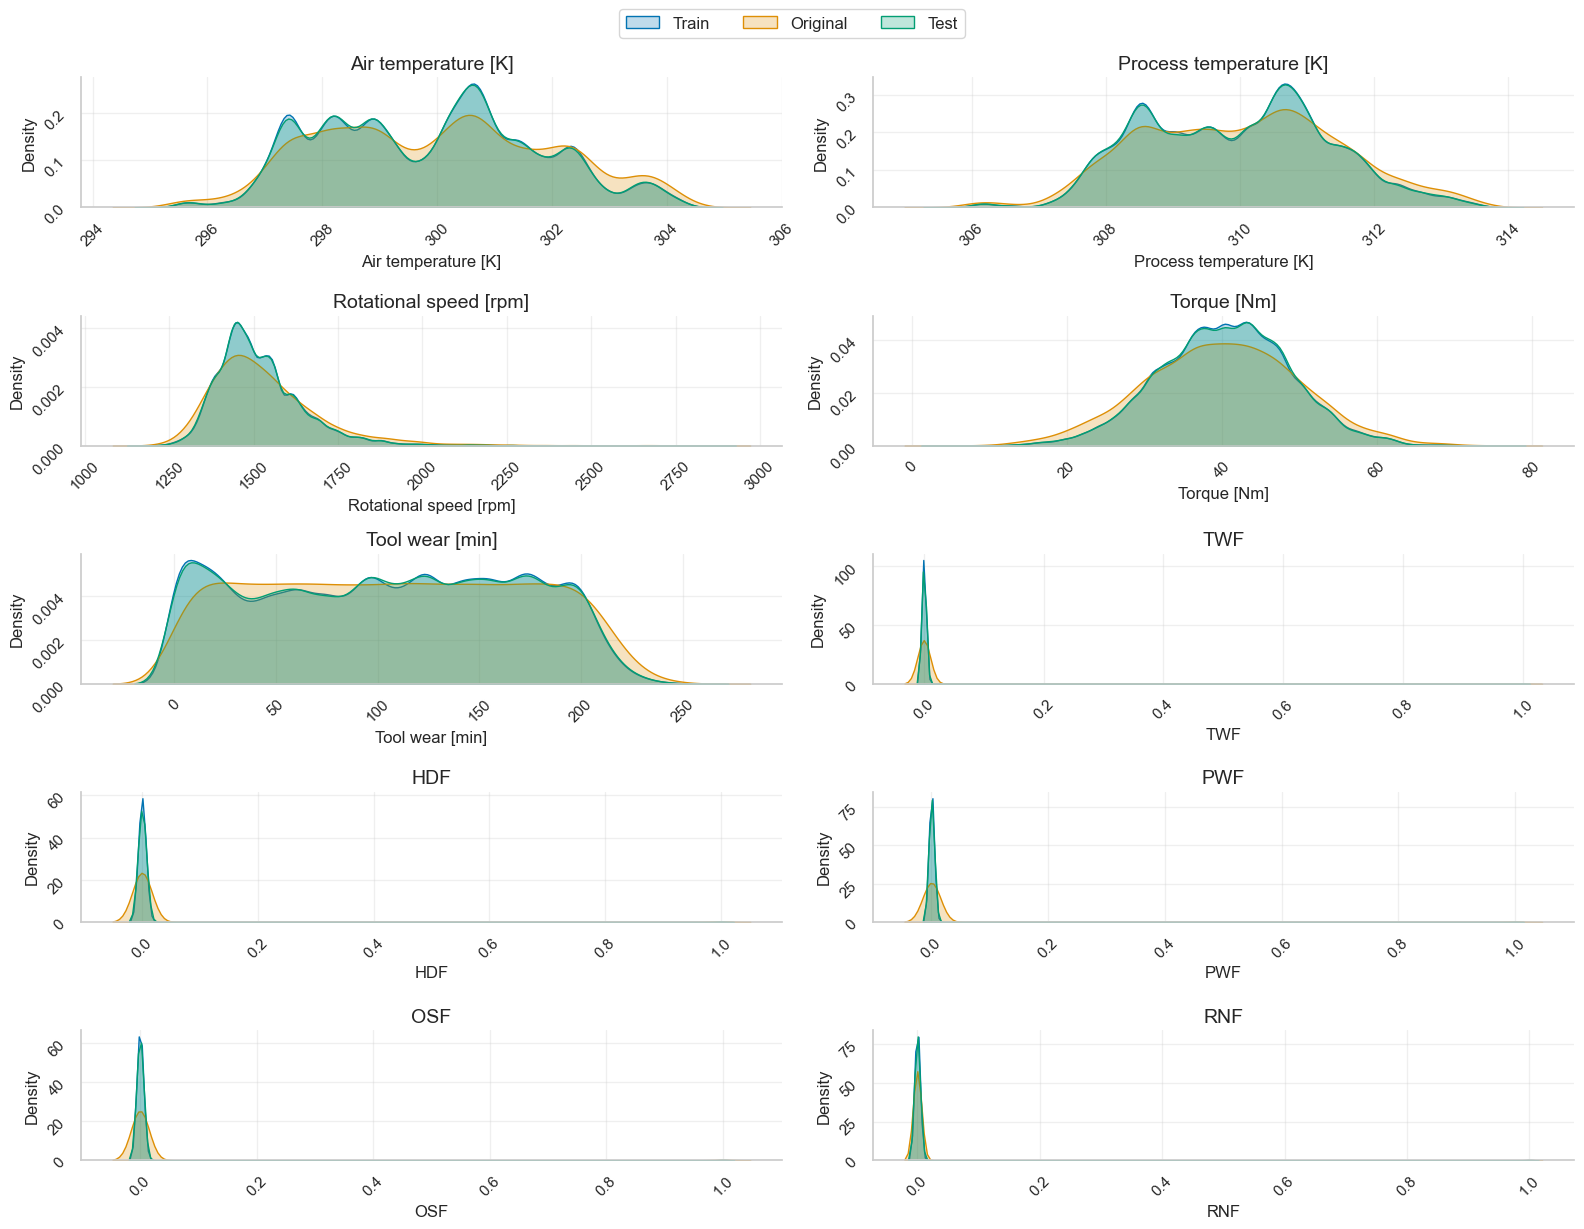

In [24]:
figure, ax = plt.subplots(5, 2, figsize=(16, 12))
ax = ax.flatten()

# create a list to exclude categorical features and the label
exclude_columns = ['Product ID', 'Type', 'Machine failure']

for index, col_name in enumerate([col for col in train_data.columns if col not in exclude_columns]):
    
    sns.kdeplot(data=train_data[col_name],
                label='Train',
                fill=True,
                ax=ax[index])
    
    sns.kdeplot(data=orig_data[col_name],
                label='Original',
                fill=True,
                ax=ax[index])
    
    sns.kdeplot(data=test_data[col_name],
                label='Test',
                fill=True,
                ax=ax[index])
   
    ax[index].set_title(col_name, fontsize=14)
    
    ax[index].tick_params(labelrotation=45)
    
    # Retrieve legend information
    handles = ax[index].get_legend_handles_labels()[0]
    labels = ax[index].get_legend_handles_labels()[1]
    ax[index].legend().remove()
    
# Set the legend
figure.legend(handles, 
              labels, 
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.03), 
              fontsize=12,
              ncol=3)

plt.tight_layout()
plt.show()